In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Set the path to the CSV file
file_path = r'C:\Users\r_mat\OneDrive\Documents\GitHub\Project_1\Data\Crime_Data_from_2020_to_Present.csv'

# Read the CSV file into a DataFrame
crime_data = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to understand the structure of the data
crime_data.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468


# 4. Demographics Analysis

### Visualization 11: <!--suppress -->
#### Count plot or pie chart showing the distribution of crime victims by gender: 
- This visualization will display the proportion or count of crime victims based on gender. A pie chart can illustrate the relative percentage of male, female, or other gender victims. A count plot can showcase the absolute count of victims by gender.

### Visualization 12: <!--suppress -->
#### Scatter plot with a linear regression line to explore the correlation between the age of the victim and the count of a specific crime type: 
- This plot aims to analyze the relationship between victim age and the occurrence of a particular crime type. It'll help determine if there's any correlation between age and the frequency of a specific crime.

### Visualization 13: <!--suppress -->
#### Histogram or kernel density plot showing the distribution of victim ages: 
- This visualization will depict the distribution of victim ages. A histogram will display age groups and their frequency, while a kernel density plot will show the probability density function of victim ages, offering insights into the age distribution of crime victims.

### Visualization 14: <!--suppress -->
#### Stacked bar plot or heat map showing the correlation between crime types and victim demographics: 
- This plot will explore the relationship between different crime types and victim demographics (e.g., age groups, gender). A stacked bar plot can display the breakdown of crime types within each demographic category, while a heat map can indicate the strength of correlation between crime types and victim demographics using colors or shades.


In [ ]:
# Visualization 11:
# Count plot chart showing the distribution of crime victims by gender

plt.figure(figsize=(6, 4))
sns.countplot(data=crime_data, x='Vict Sex')
plt.xlabel('Victim Gender')
plt.ylabel('Count')
plt.title('Distribution of Victim Gender')
plt.show()

# For a Pie Chart

plt.figure(figsize=(8, 8))
crime_data['Vict Sex'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Crime Victims by Gender')
plt.ylabel('')  # Remove the label on the y-axis

plt.show()

In [12]:
# Visualization 12: 
# Scatter plot with a linear regression line to explore the correlation between the 
# age of the victim and the count of a specific crime type.

# Overview of crime counts by age
crime_counts_by_age = crime_data['Vict Age'].value_counts()

# Display the top 10 areas with the highest crime counts
top_crime_age = crime_counts_by_age.head(10)
print("Top 10 Age with the Highest Crime Counts:")
print(top_crime_age)

# Overview of crime counts by specific crime type
crime_counts_by_type = crime_data['Crm Cd Desc'].value_counts()

# Display the top 10 specific crime types with the highest counts
top_crime_types = crime_counts_by_type.head(15)
print("\nTop 10 Crime Types with the Highest Counts:")
print(top_crime_types)

Top 10 Age with the Highest Crime Counts:
Vict Age
0     211842
30     19421
35     19008
31     18603
29     18552
28     18266
32     18066
33     17557
27     17534
26     16859
Name: count, dtype: int64

Top 10 Crime Types with the Highest Counts:
Crm Cd Desc
VEHICLE - STOLEN                                            91473
BATTERY - SIMPLE ASSAULT                                    67976
THEFT OF IDENTITY                                           53467
BURGLARY FROM VEHICLE                                       52611
BURGLARY                                                    51961
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)     51826
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT              48876
THEFT PLAIN - PETTY ($950 & UNDER)                          43402
INTIMATE PARTNER - SIMPLE ASSAULT                           42729
THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)             32875
THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER)         30716
ROBBERY   

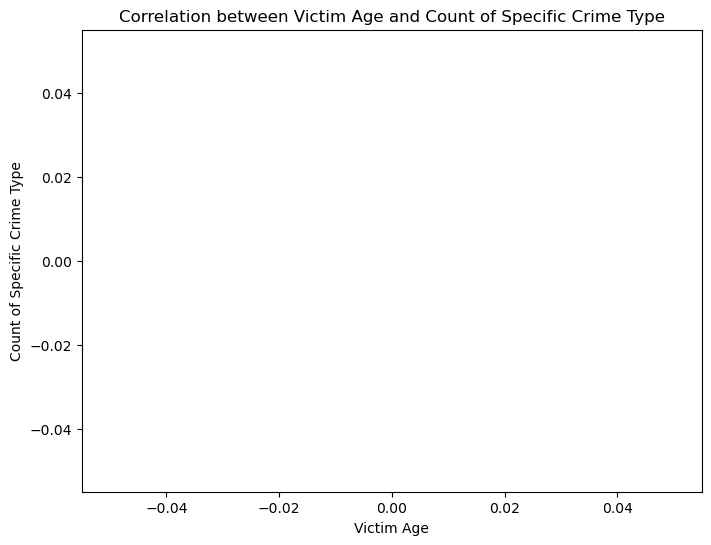

In [13]:
crime_counts_by_age = crime_data['Vict Age'].value_counts()
crime_counts_by_type = crime_data['Crm Cd Desc'].value_counts()

# Create a DataFrame with crime type counts and occurrences
crime_sctype_df = pd.DataFrame({'Count': crime_counts_by_type, 'Age': crime_counts_by_age})

plt.figure(figsize=(8, 6))
sns.regplot(data=crime_sctype_df, x='Age', y='Count', scatter=True)

plt.xlabel('Victim Age')
plt.ylabel('Count of Specific Crime Type')
plt.title('Correlation between Victim Age and Count of Specific Crime Type')
plt.show()

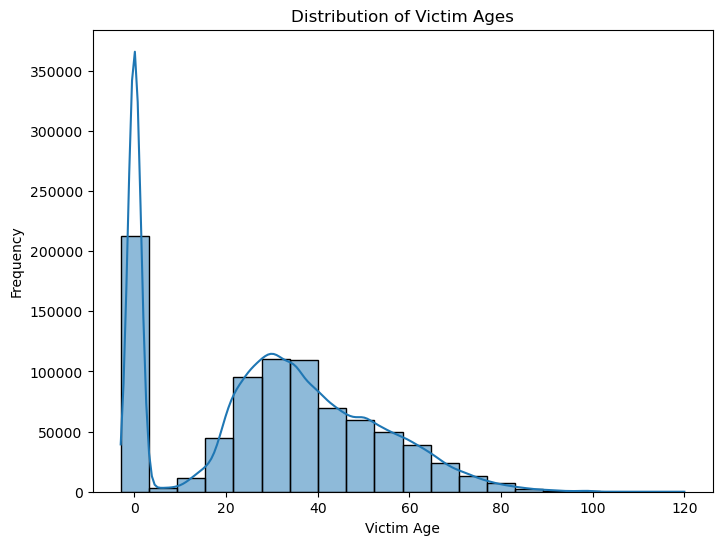

In [15]:
# Visualization 13: 
# Histogram or kernel density plot showing the distribution of victim ages.

plt.figure(figsize=(8, 6))
sns.histplot(crime_data['Vict Age'], bins=20, kde=True)
plt.xlabel('Victim Age')
plt.ylabel('Frequency')
plt.title('Distribution of Victim Ages')
plt.show()

In [17]:
# Visualization 14: 
# Stacked bar plot or heat map showing the correlation between crime types and victim demographics.

crime_counts_by_age = crime_data['Vict Age'].value_counts()
crime_counts_by_sex = crime_data['Vict Sex'].value_counts()
crime_counts_by_ethnicity = crime_data['Vict Descent'].value_counts()

# Creating DataFrames for each count
age_df = pd.DataFrame({'Age': crime_counts_by_age.index, 'Count_Age': crime_counts_by_age.values})
sex_df = pd.DataFrame({'Sex': crime_counts_by_sex.index, 'Count_Sex': crime_counts_by_sex.values})
ethnicity_df = pd.DataFrame({'Ethnicity': crime_counts_by_ethnicity.index, 'Count_Ethnicity': crime_counts_by_ethnicity.values})

# Merging the DataFrames on a common column
victim_demographics = pd.concat([age_df, sex_df, ethnicity_df], axis=1)

victim_demographics.head()


,Age,Count_Age,Sex,Count_Sex,Ethnicity,Count_Ethnicity
0,0,211842,M,351362.0,H,261145.0
1,30,19421,F,313468.0,W,173440.0
2,35,19008,X,75420.0,B,120896.0
3,31,18603,H,93.0,X,83214.0
4,29,18552,-,1.0,O,67532.0


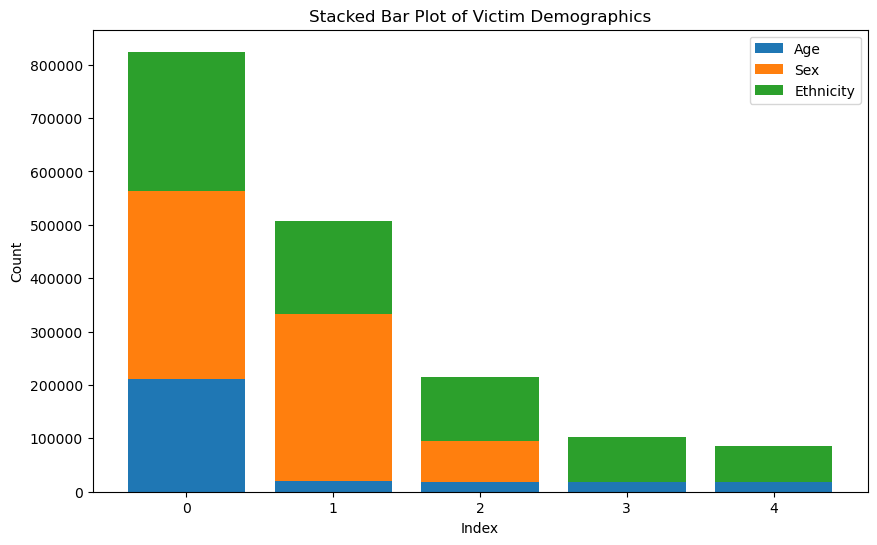

In [5]:
# Victim_demographics DataFrame
victim_demographics = pd.DataFrame({
    'Age': [0, 30, 35, 31, 29],
    'Count_Age': [211842, 19421, 19008, 18603, 18552],
    'Sex': ['M', 'F', 'X', 'H', '-'],
    'Count_Sex': [351362.0, 313468.0, 75420.0, 93.0, 1.0],
    'Ethnicity': ['H', 'W', 'B', 'X', 'O'],
    'Count_Ethnicity': [261145.0, 173440.0, 120896.0, 83214.0, 67532.0]
})

# Plotting stacked bar plot
plt.figure(figsize=(10, 6))

# Stacked bar plot for Age
plt.bar(victim_demographics.index, victim_demographics['Count_Age'], label='Age')

# Stacked bar plot for Sex
plt.bar(victim_demographics.index, victim_demographics['Count_Sex'],
        bottom=victim_demographics['Count_Age'], label='Sex')

# Stacked bar plot for Ethnicity
plt.bar(victim_demographics.index, victim_demographics['Count_Ethnicity'],
        bottom=victim_demographics['Count_Age'] + victim_demographics['Count_Sex'], label='Ethnicity')

# Adding labels and title
plt.xlabel('Index')
plt.ylabel('Count')
plt.title('Stacked Bar Plot of Victim Demographics')
plt.legend()

# Show plot
plt.show()


In [21]:
# Overview of crime counts by specific crime type
crime_counts_by_type = crime_data['Crm Cd Desc'].value_counts()

# Display the top 10 specific crime types with the highest counts
top_crime_types = crime_counts_by_type.head(15)

print("\nTop 10 Crime Types with the Highest Counts:")
print(top_crime_types)


Top 10 Crime Types with the Highest Counts:
Crm Cd Desc
VEHICLE - STOLEN                                            91473
BATTERY - SIMPLE ASSAULT                                    67976
THEFT OF IDENTITY                                           53467
BURGLARY FROM VEHICLE                                       52611
BURGLARY                                                    51961
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)     51826
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT              48876
THEFT PLAIN - PETTY ($950 & UNDER)                          43402
INTIMATE PARTNER - SIMPLE ASSAULT                           42729
THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)             32875
THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER)         30716
ROBBERY                                                     29205
THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD    28009
VANDALISM - MISDEAMEANOR ($399 OR UNDER)                    22590
SHOPLIFTING - PETTY

In [22]:
import pandas as pd

# Assuming 'crime_data' contains detailed crime records with demographics
# Let's create a sample DataFrame with demographics for illustration purposes
# This is a hypothetical example; you would need actual demographic data
demographics_data = {
    'Crm Cd Desc': [
        'VEHICLE - STOLEN', 'BATTERY - SIMPLE ASSAULT', 'THEFT OF IDENTITY', 'BURGLARY FROM VEHICLE', 'BURGLARY',
        'VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)', 'ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT',
        'THEFT PLAIN - PETTY ($950 & UNDER)', 'INTIMATE PARTNER - SIMPLE ASSAULT', 'THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)'
    ],
    'Demographic': ['Young', 'Middle-aged', 'Young', 'Elderly', 'Middle-aged',
                    'Young', 'Middle-aged', 'Elderly', 'Young', 'Middle-aged']
    # Add other demographic information corresponding to each crime type
}

# Create a DataFrame with demographics linked to top crime types
crime_counts_by_type = crime_data['Crm Cd Desc'].value_counts()
top_crime_types = crime_counts_by_type.head(10)

# Filter demographics for the top crime types (this assumes 'Crm Cd Desc' exists in the demographics data)
demographics_df = pd.DataFrame(demographics_data)
demographics_for_top_crimes = demographics_df[demographics_df['Crm Cd Desc'].isin(top_crime_types.index)]

print(demographics_for_top_crimes)


                                         Crm Cd Desc  Demographic
0                                   VEHICLE - STOLEN        Young
1                           BATTERY - SIMPLE ASSAULT  Middle-aged
2                                  THEFT OF IDENTITY        Young
3                              BURGLARY FROM VEHICLE      Elderly
4                                           BURGLARY  Middle-aged
5  VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...        Young
6     ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT  Middle-aged
7                 THEFT PLAIN - PETTY ($950 & UNDER)      Elderly
8                  INTIMATE PARTNER - SIMPLE ASSAULT        Young
9    THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)  Middle-aged


In [23]:
import pandas as pd

# Assuming you have crime_counts_by_type and victim_demographics DataFrames

# Merge crime counts by type with victim demographics
merged_data = pd.merge(crime_counts_by_type, victim_demographics, left_index=True, right_index=True)

print(merged_data)


Empty DataFrame
Columns: [count, Age, Count_Age, Sex, Count_Sex, Ethnicity, Count_Ethnicity]
Index: []
